In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
import math

r = [0, 8, 16] # There are three points clusters with radius 0, 8, 16 repectively.
theta = np.linspace(0, 2*math.pi, 300) # Generate 300 points 

In [159]:
def generate_points(Rs, theta, sigma=1):
    '''
    input: 
        Rs:numpy.array means the radius for each clusters
        theta:numpy.array defines how mang points to generate
        sigma:float defines the gaussian random noise
    output:
        Generate 3*len(theta) points with gaussian noise
    '''
    
    
    number_of_points_each_C = len(theta) # the number of points in each class
    theta = theta[:,np.newaxis] # To make dimension of theta (n,)
    ones = np.ones((number_of_points_each_C,1)) # An intermediate constants array for assigning points classes

    result = np.zeros([number_of_points_each_C*3,3]) # Define the final output, each of the entries is set 0
    
    from numpy.random import normal
    for class_, r in enumerate(Rs):
        start = class_*number_of_points_each_C   # define the first index for class_i
        end = (class_+1)*number_of_points_each_C # define the last  index for class_i
        
        C = ones*class_ # class_i
        x = r*np.cos(theta) + normal(0, sigma, (number_of_points_each_C,1)) # x coordinate
        y = r*np.sin(theta) + normal(0, sigma, (number_of_points_each_C,1)) # y coordinate
        
        points = np.concatenate([x,y,C], axis = 1) # concatenate X coordinate, y coordinate and class_i into an array
        result[start:end] += points # update the final output with class_i array
    return result
        

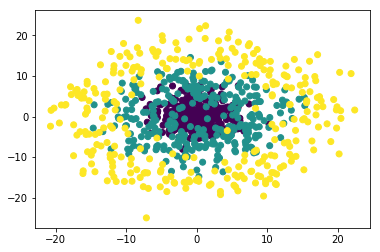

In [160]:
points = generate_points(r, theta, sigma = 3) # generate points for training kernel PCA

plt.scatter(points[:,0], points[:,1], c = points[:,2]) # plot points

In [161]:
def GaussianKernel(x,y,sigma = 1):
    difference = x[:,np.newaxis,:] - y[np.newaxis,:,:] # Using broadcast to easily compute GaussianKernel across all points.
    return np.exp(-np.sum(np.square(difference),axis = 2)/sigma**2)

def createIm(l):
    Im = np.identity(l)/l  # Create an identity matrix
    return Im

def constructC(K):
    l = len(K)
    Im = createIm(l)
    K = K - np.dot(Im, K) - np.dot(K, Im) - np.dot(Im, K, Im) #
    return K
    
def test_Kernel_Construction():
    '''
    This function is for testing if the kernel construction is wrong
    
    '''
    point1 = np.array(((0,1),(0,2)))
    point2 = np.array(((0,2),(0,1)))
    test_K = GaussianKernel(point1, point2)
    test_K = constructC(test_K)
    print(test_K)
    
    
test_Kernel_Construction()

[[-0.18393972 -0.5       ]
 [-0.5        -0.18393972]]


In [162]:
train_p = points[:,:2]
K = GaussianKernel(train_p, train_p, sigma = 8) # 这里的sigma是一个kernel PCA的超参数，可以调试看对结果的影响，感受一下超参数的影响
K = constructC(K)
K[0:5,0:5]

array([[0.99666667, 0.97918066, 0.68328716, 0.65168844, 0.6506974 ],
       [0.97918066, 0.99666667, 0.73726733, 0.63439167, 0.74039207],
       [0.68328716, 0.73726733, 0.99666667, 0.83966754, 0.93521461],
       [0.65168844, 0.63439167, 0.83966754, 0.99666667, 0.64512241],
       [0.6506974 , 0.74039207, 0.93521461, 0.64512241, 0.99666667]])

In [163]:
print(K.shape)
from numpy.linalg import eig

lamda, v = eig(K) # train the data. PS: the eigen value of Kernel matrix is the coordinates in the new space

(900, 900)


In [164]:
print(v.shape)

(900, 900)


(0.4127429744777565+5.444762482778192e-34j)


C:\Users\82091\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


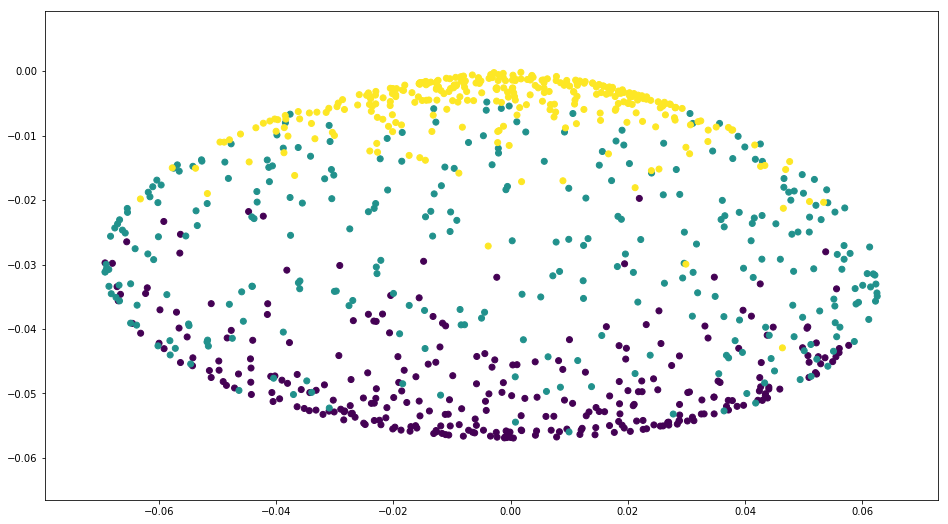

In [165]:
print(lamda[:2].sum()/lamda.sum())
plt.figure(figsize = (16,9))
plt.scatter(v[:,1],v[:,0],c=points[:,2])

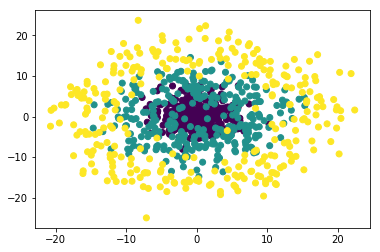

C:\Users\82091\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


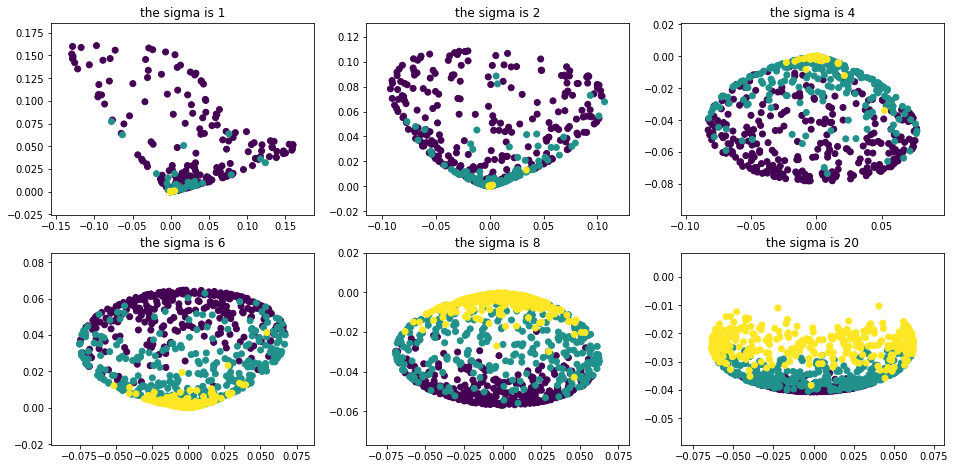

In [168]:
plt.scatter(points[:,0],points[:,1],c = points[:,2])
plt.show()
sigmas = [1,2,4,6,8,20]
plt.figure(figsize = (16,12))
plt.subplot(3,1,1)
plt.scatter(points[:,0],points[:,1],c = points[:,2])
for index, sigma in enumerate(sigmas):
    K = GaussianKernel(train_p, train_p, sigma) # 这里的sigma是一个kernel PCA的超参数，可以调试看对结果的影响，感受一下超参数的影响
    K = constructC(K)
    lamda, v = eig(K)
    plt.subplot(3,3,index+1, title = 'the sigma is {}'.format(sigma))
    plt.scatter(v[:,1],v[:,0],c=points[:,2])
        
    





## <center>当gaussian kernel标准差大致取每个点群之间距离时，区别效果最好</center>